In [2]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp

In [3]:
df = pd.read_csv('SPEEDI APSP EACD FINAL.csv')
d = pd.read_csv('SPEEDI APSP EACD FINAL.csv')

In [4]:
df2 = pd.read_csv('2024_April 15_SPEEDI data.csv')

In [6]:
d.groupby('C_1_TRT')['C_1_SEX'].value_counts()

C_1_TRT  C_1_SEX
1.0      2.0        14
         1.0        13
2.0      1.0        15
         2.0        12
3.0      1.0        17
         2.0        12
Name: C_1_SEX, dtype: int64

In [7]:
d.groupby('C_1_SEX')[['C_2_APS_TWS','C_3_APS_TWS','C_4_APS_TWS']].agg(['mean','count'])

C_2_APS_TWS       C_3_APS_TWS       C_4_APS_TWS      
               mean count        mean count        mean count
C_1_SEX                                                      
1.0      103.057143    35  172.800000    35  231.571429    35
2.0       99.407407    27  152.296296    27  246.962963    27

In [8]:
d.groupby('C_1_SEX')[['C_2_APS_RPM','C_3_APS_RPM','C_4_APS_RPM']].agg(['mean','count'])

C_2_APS_RPM       C_3_APS_RPM       C_4_APS_RPM      
               mean count        mean count        mean count
C_1_SEX                                                      
1.0       18.571541    33   34.860161    29   52.193305    26
2.0       17.139662    27   34.290203    20   53.058642    21

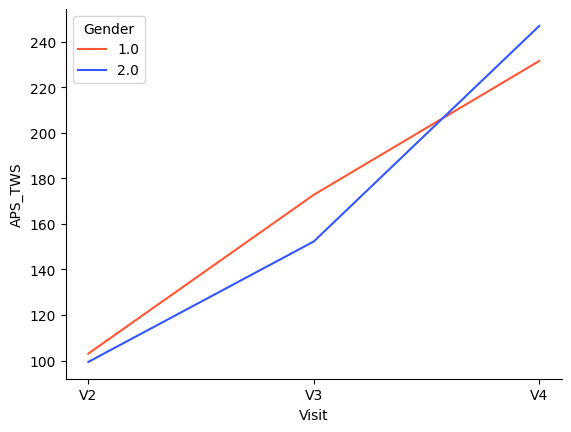

In [9]:
sex_based_aps_score = d.groupby('C_1_SEX')[['C_2_APS_TWS','C_3_APS_TWS','C_4_APS_TWS']].mean().melt()
sex_based_aps_score['Gender'] = sex_based_aps_score.groupby('variable').cumcount() + 1.0
sex_based_aps_score['Visit'] = sex_based_aps_score['variable'].replace({
    'C_2_APS_TWS': 'V2',
    'C_3_APS_TWS': 'V3',
    'C_4_APS_TWS': 'V4'
})
sex_based_aps_score.rename(columns={'value': 'APS_TWS'}, inplace=True)
sex_based_aps_score.drop(columns='variable',inplace = True)

custom_palette = ["#FF5733", "#3357FF"]
sns.lineplot(data = sex_based_aps_score, x = 'Visit', y = 'APS_TWS',hue = 'Gender',palette = custom_palette)
sns.despine()
plt.show()

In [10]:
d.groupby('C_1_Race')[['C_2_APS_TWS','C_3_APS_TWS','C_4_APS_TWS']].agg(['mean','count'])

C_2_APS_TWS       C_3_APS_TWS       C_4_APS_TWS      
                mean count        mean count        mean count
C_1_Race                                                      
2.0       105.000000     1  301.000000     1  320.000000     1
3.0       112.869565    23  140.521739    23  241.521739    23
5.0        96.666667    33  185.060606    33  255.090909    33
7.0              NaN     0         NaN     0         NaN     0
8.0        80.000000     5  104.000000     5   96.000000     5

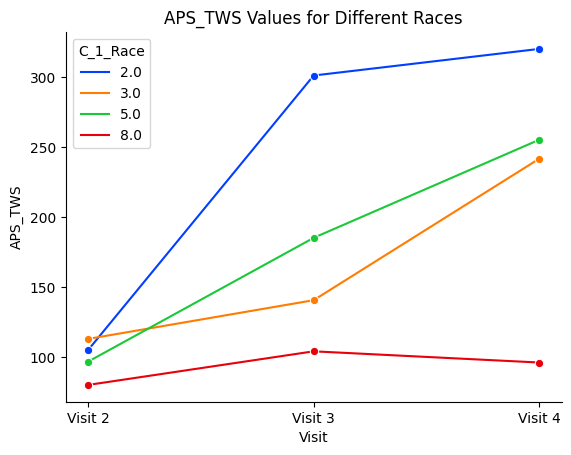

In [11]:
race_based_aps_score = d.groupby('C_1_Race')[['C_2_APS_TWS','C_3_APS_TWS','C_4_APS_TWS']].mean().reset_index()
df_melted = race_based_aps_score.melt(id_vars='C_1_Race', 
                                      value_vars=['C_2_APS_TWS', 'C_3_APS_TWS', 'C_4_APS_TWS'],
                                      var_name='Visit', value_name='APS_TWS')
df_melted['Visit'] = df_melted['Visit'].map({'C_2_APS_TWS': 'Visit 2', 'C_3_APS_TWS': 'Visit 3', 'C_4_APS_TWS': 'Visit 4'})
df_melted = df_melted.dropna(subset=['APS_TWS'])
sns.lineplot(data=df_melted, x='Visit', y='APS_TWS', hue='C_1_Race', marker='o', palette='bright')

plt.title('APS_TWS Values for Different Races')
plt.ylabel('APS_TWS')
plt.xlabel('Visit')

sns.despine()
plt.show()

In [12]:
race_based_aps_score = d.groupby('C_1_Race')[['C_2_APS_TWS','C_3_APS_TWS','C_4_APS_TWS']].mean().reset_index()
df_melted = race_based_aps_score.melt(id_vars='C_1_Race', 
                                      value_vars=['C_2_APS_TWS', 'C_3_APS_TWS', 'C_4_APS_TWS'],
                                      var_name='Visit', value_name='APS_TWS')
df_melted

,C_1_Race,Visit,APS_TWS
0,2.0,C_2_APS_TWS,105.000000
1,3.0,C_2_APS_TWS,112.869565
2,5.0,C_2_APS_TWS,96.666667
3,7.0,C_2_APS_TWS,NaN
4,8.0,C_2_APS_TWS,80.000000
5,2.0,C_3_APS_TWS,301.000000
6,3.0,C_3_APS_TWS,140.521739
7,5.0,C_3_APS_TWS,185.060606
8,7.0,C_3_APS_TWS,NaN
9,8.0,C_3_APS_TWS,104.000000


In [13]:
ethinicity_based_aps_score = d.groupby('C_1_ETH')[['C_2_APS_TWS','C_3_APS_TWS','C_4_APS_TWS']].agg(['mean','count'])

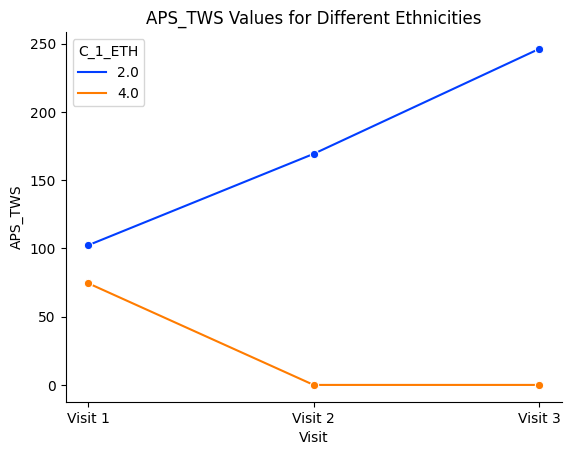

In [14]:
ethinicity_based_aps_score = d.groupby('C_1_ETH')[['C_2_APS_TWS','C_3_APS_TWS','C_4_APS_TWS']].mean().reset_index()
df_melted = pd.melt(ethinicity_based_aps_score,id_vars = 'C_1_ETH',value_vars = ['C_2_APS_TWS', 'C_3_APS_TWS', 'C_4_APS_TWS'],var_name = 'Visit',value_name = 'APS_TWS')
df_melted['Visit'] = 'Visit ' + (df_melted.groupby('C_1_ETH').cumcount() + 1).astype(str)
df_melted = df_melted.dropna(subset=['APS_TWS'])
sns.lineplot(data=df_melted, x='Visit', y='APS_TWS', hue='C_1_ETH', marker='o', palette='bright')

plt.title('APS_TWS Values for Different Ethnicities')
plt.ylabel('APS_TWS')
plt.xlabel('Visit')

sns.despine()
plt.show()

In [15]:
# Preparing Data for Analysis
df = df[['CID','C_2_APS_TWS','C_3_APS_TWS','C_4_APS_TWS','C_2_APS_RPM','C_3_APS_RPM','C_4_APS_RPM','C_1_TRT']]
df.head()

,CID,C_2_APS_TWS,C_3_APS_TWS,C_4_APS_TWS,C_2_APS_RPM,C_3_APS_RPM,C_4_APS_RPM,C_1_TRT
0,1001,146.0,154.0,330.0,24.333333,25.666667,55.000000,1.0
1,1002,134.0,182.0,359.0,22.333333,30.333333,59.833333,3.0
2,1003,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1004,59.0,0.0,0.0,9.833333,NaN,NaN,3.0
4,1005,7.0,53.0,147.0,1.166667,8.833333,24.500000,3.0


# Null Values 

In [16]:
df[['CID','C_2_APS_TWS','C_3_APS_TWS','C_4_APS_TWS','C_2_APS_RPM','C_3_APS_RPM','C_4_APS_RPM','C_1_TRT']].isna().sum()

CID             0
C_2_APS_TWS    23
C_3_APS_TWS    23
C_4_APS_TWS    23
C_2_APS_RPM    25
C_3_APS_RPM    36
C_4_APS_RPM    38
C_1_TRT         2
dtype: int64

In [17]:
missing_values = d.isna().sum().reset_index().sort_values(by = 0, ascending = False).rename(columns = {0:'Count','index':'Column Name'})

In [18]:
missing_values

,Column Name,Count
149,C_4_APS_GOF,38
130,C_4_APS_CES,38
128,C_4_APS_Cd,38
127,C_4_APS_Cws,38
126,C_4_APS_Cn,38
...,...,...
4,C_1_SEX,2
3,C_1_ETH,2
2,C_1_Race,2
6,C_1_WP,0


In [19]:
df[df.isna().any(axis=1)].count()

CID            44
C_2_APS_TWS    21
C_3_APS_TWS    21
C_4_APS_TWS    21
C_2_APS_RPM    19
C_3_APS_RPM     8
C_4_APS_RPM     6
C_1_TRT        42
dtype: int64

In [20]:
filt_columns = [cols for cols in df.columns if "APS_TWS" in cols]

filtered_df = df[(df[filt_columns].isna()).any(axis=1)]

CID_any = filtered_df['CID']

In [21]:
filt_columns = [cols for cols in df.columns if "APS_TWS" in cols]

filtered_df = df[(df[filt_columns].isna()).all(axis=1)]

CID_with_null_values = list(filtered_df['CID'])

filtered_df['CID'].count()

23

In [22]:
all(item in CID_with_null_values for item in CID_any)

True

In [23]:
(CID_any==CID_with_null_values).sum()

23

#### 23 rows with all APS_TWS values as null. Infact when all instance of APS_TWS value occur with all values missing and not a single or two value missing

In [24]:
filt_columns_any = [cols for cols in df.columns if "APS_RPM" in cols]

filtered_df_any = df[(df[filt_columns_any].isna()).any(axis=1)]

CID_any = filtered_df_any['CID']

CID_any.count()

44

In [178]:
filtered_df_any.head()

,CID,C_2_APS_TWS,C_3_APS_TWS,C_4_APS_TWS,C_2_APS_RPM,C_3_APS_RPM,C_4_APS_RPM,C_1_TRT
2,1003,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1004,59.0,0.0,0.0,9.833333,NaN,NaN,3.0
8,1009,101.0,0.0,0.0,16.833333,NaN,NaN,2.0
10,1011,69.0,0.0,0.0,11.500000,NaN,NaN,2.0
12,1013,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [27]:
filt_columns = [cols for cols in df.columns if "APS_RPM" in cols]

filtered_df = df[(df[filt_columns].isna()).all(axis=1)]

CID_all = list(filtered_df['CID'])

filtered_df['CID'].count()

23

In [85]:
all(item in CID_all for item in CID_any)

False

In [29]:
filt_df = filtered_df_any[filt_columns_any].reset_index().drop(columns='index',axis = 1)

res = []
cnt = 0 

for i in range(len(filtered_df_any)):
    cnt = 0 
    if pd.isna(filt_df.loc[i,'C_2_APS_RPM']):
        cnt+=1
        res.append('C_2_APS_RPM')
    if pd.isna(filt_df.loc[i,'C_3_APS_RPM']):
        cnt+=1
        res.append('C_3_APS_RPM')
    if pd.isna(filt_df.loc[i,'C_4_APS_RPM']):
        cnt+=1
        res.append('C_4_APS_RPM')
    res.append((i,cnt))

res

['C_2_APS_RPM',
 'C_3_APS_RPM',
 'C_4_APS_RPM',
 (0, 3),
 'C_3_APS_RPM',
 'C_4_APS_RPM',
 (1, 2),
 'C_3_APS_RPM',
 'C_4_APS_RPM',
 (2, 2),
 'C_3_APS_RPM',
 'C_4_APS_RPM',
 (3, 2),
 'C_2_APS_RPM',
 'C_3_APS_RPM',
 'C_4_APS_RPM',
 (4, 3),
 'C_2_APS_RPM',
 'C_3_APS_RPM',
 'C_4_APS_RPM',
 (5, 3),
 'C_3_APS_RPM',
 'C_4_APS_RPM',
 (6, 2),
 'C_2_APS_RPM',
 'C_3_APS_RPM',
 'C_4_APS_RPM',
 (7, 3),
 'C_2_APS_RPM',
 'C_3_APS_RPM',
 'C_4_APS_RPM',
 (8, 3),
 'C_2_APS_RPM',
 'C_3_APS_RPM',
 'C_4_APS_RPM',
 (9, 3),
 'C_3_APS_RPM',
 'C_4_APS_RPM',
 (10, 2),
 'C_2_APS_RPM',
 'C_3_APS_RPM',
 'C_4_APS_RPM',
 (11, 3),
 'C_2_APS_RPM',
 'C_3_APS_RPM',
 'C_4_APS_RPM',
 (12, 3),
 'C_3_APS_RPM',
 (13, 1),
 'C_2_APS_RPM',
 'C_3_APS_RPM',
 'C_4_APS_RPM',
 (14, 3),
 'C_3_APS_RPM',
 'C_4_APS_RPM',
 (15, 2),
 'C_3_APS_RPM',
 'C_4_APS_RPM',
 (16, 2),
 'C_4_APS_RPM',
 (17, 1),
 'C_2_APS_RPM',
 'C_3_APS_RPM',
 'C_4_APS_RPM',
 (18, 3),
 'C_2_APS_RPM',
 'C_3_APS_RPM',
 'C_4_APS_RPM',
 (19, 3),
 'C_2_APS_RPM',
 'C_3_APS_

In [30]:
nan_counts = []
nan_columns = []

for i in range(len(filt_df)):
    cnt = 0  
    cols_with_nan = []  
    
    if pd.isna(filt_df.loc[i, 'C_2_APS_RPM']):
        cnt += 1
        cols_with_nan.append('V2')
    if pd.isna(filt_df.loc[i, 'C_3_APS_RPM']):
        cnt += 1
        cols_with_nan.append('V3')
    if pd.isna(filt_df.loc[i, 'C_4_APS_RPM']):
        cnt += 1
        cols_with_nan.append('V4')
    
    nan_counts.append(cnt)
    nan_columns.append(cols_with_nan)

filt_df['NaN_count_RPM'] = nan_counts
filt_df['NaN_columns_RPM'] = nan_columns

In [31]:
original_cols = ['C_2_APS_RPM', 'C_3_APS_RPM', 'C_4_APS_RPM']
replacement_cols = ['V2', 'V3', 'V4']

filt_df['NaN_count_RPM'] = filt_df[original_cols].isna().sum(axis=1)

filt_df['NaN_columns_RPM'] = filt_df[original_cols].apply(lambda x: [replacement_cols[i] for i, col in enumerate(original_cols) if pd.isna(x[col])], axis=1)

CID_any = CID_any.reset_index().drop(columns = 'index')
df_merged = CID_any.merge(filt_df,left_index = True,right_index = True)

df_merged[['CID','NaN_count_RPM','NaN_columns_RPM']].head(3)

,CID,NaN_count_RPM,NaN_columns_RPM
0,1003,3,"[V2, V3, V4]"
1,1004,2,"[V3, V4]"
2,1009,2,"[V3, V4]"


In [32]:
df_merged.loc[df_merged['NaN_count_RPM']!=3,['CID','NaN_count_RPM','NaN_columns_RPM']].sort_values(by = ['NaN_count_RPM','CID'],ascending = [False,True])

,CID,NaN_count_RPM,NaN_columns_RPM
1,1004,2,"[V3, V4]"
2,1009,2,"[V3, V4]"
3,1011,2,"[V3, V4]"
6,1016,2,"[V3, V4]"
10,1022,2,"[V3, V4]"
15,1031,2,"[V3, V4]"
16,1034,2,"[V3, V4]"
25,2005,2,"[V3, V4]"
26,2008,2,"[V3, V4]"
13,1029,1,[V3]


In [159]:
# Explode the NaN_columns_RPM column to count occurrences
df_merged.explode('NaN_columns_RPM')['NaN_columns_RPM'].value_counts()

V4    38
V3    36
V2    25
Name: NaN_columns_RPM, dtype: int64

In [158]:
# Counts when all the Values are not NaN
df_merged.loc[df_merged['NaN_count_RPM']!=3,['CID','NaN_count_RPM','NaN_columns_RPM']].explode('NaN_columns_RPM')['NaN_columns_RPM'].value_counts()

V4    15
V3    13
V2     2
Name: NaN_columns_RPM, dtype: int64

In [87]:
all(item in CID_all for item in CID_with_null_values)

# ALl missing values of APS_RPM correspond to all missing values of APS_TWS i.e. when all
# AWS_TWS are missing then all AWS_RPM is also missing

True

# APS_TWS with 0 Value 

In [180]:
filt_columns = [cols for cols in df.columns if "APS_TWS" in cols]

filtered_df = df[(df[filt_columns] == 0).any(axis=1)]

print(filtered_df[filt_columns].count())

filtered_df.head()

C_2_APS_TWS    21
C_3_APS_TWS    21
C_4_APS_TWS    21
dtype: int64


,CID,C_2_APS_TWS,C_3_APS_TWS,C_4_APS_TWS,C_2_APS_RPM,C_3_APS_RPM,C_4_APS_RPM,C_1_TRT
3,1004,59.0,0.0,0.0,9.833333,NaN,NaN,3.0
8,1009,101.0,0.0,0.0,16.833333,NaN,NaN,2.0
10,1011,69.0,0.0,0.0,11.500000,NaN,NaN,2.0
15,1016,130.0,0.0,0.0,21.812081,NaN,NaN,2.0
21,1022,109.0,0.0,0.0,18.166667,NaN,NaN,2.0


In [185]:
df.loc[df['C_2_APS_TWS']==0,['CID','C_2_APS_TWS','C_3_APS_TWS','C_4_APS_TWS']]

,CID,C_2_APS_TWS,C_3_APS_TWS,C_4_APS_TWS
69,2022,0.0,223.0,351.0
80,2033,0.0,125.0,163.0


In [186]:
df.loc[df['C_3_APS_TWS']==0,['CID','C_2_APS_TWS','C_3_APS_TWS','C_4_APS_TWS']]

,CID,C_2_APS_TWS,C_3_APS_TWS,C_4_APS_TWS
3,1004,59.0,0.0,0.0
8,1009,101.0,0.0,0.0
10,1011,69.0,0.0,0.0
15,1016,130.0,0.0,0.0
21,1022,109.0,0.0,0.0
28,1029,133.0,0.0,365.0
30,1031,119.0,0.0,0.0
33,1034,90.0,0.0,0.0
45,1046,83.0,0.0,224.0
48,2001,64.0,0.0,419.0


In [187]:
df.loc[df['C_4_APS_TWS']==0,['CID','C_2_APS_TWS','C_3_APS_TWS','C_4_APS_TWS']]

,CID,C_2_APS_TWS,C_3_APS_TWS,C_4_APS_TWS
3,1004,59.0,0.0,0.0
8,1009,101.0,0.0,0.0
10,1011,69.0,0.0,0.0
15,1016,130.0,0.0,0.0
21,1022,109.0,0.0,0.0
30,1031,119.0,0.0,0.0
33,1034,90.0,0.0,0.0
34,1035,137.0,201.0,0.0
49,2002,77.0,181.0,0.0
52,2005,126.0,0.0,0.0


In [69]:
filt_columns = [cols for cols in df.columns if "APS_TWS" in cols]

filtered_df = df[(df[filt_columns] == 0).all(axis=1)]

filtered_df['CID'].count()

# No Child has all three values of APS_TWS as zero.

0

In [62]:
print("NaN Values in C_1_TRT : ",df['C_1_TRT'].isna().sum())
df[df['C_1_TRT'].isna()]

# Can Ignore these values since it is NaN for all values.

# Could be problem in data collection

NaN Values in C_1_TRT :  2


,CID,C_2_APS_TWS,C_3_APS_TWS,C_4_APS_TWS,C_2_APS_RPM,C_3_APS_RPM,C_4_APS_RPM,C_1_TRT
29,1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,2031,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
df[(df == 0).any(axis=1)].head()

,CID,C_2_APS_TWS,C_3_APS_TWS,C_4_APS_TWS,C_2_APS_RPM,C_3_APS_RPM,C_4_APS_RPM,C_1_TRT
3,1004,59.0,0.0,0.0,9.833333,NaN,NaN,3.0
8,1009,101.0,0.0,0.0,16.833333,NaN,NaN,2.0
10,1011,69.0,0.0,0.0,11.500000,NaN,NaN,2.0
15,1016,130.0,0.0,0.0,21.812081,NaN,NaN,2.0
21,1022,109.0,0.0,0.0,18.166667,NaN,NaN,2.0


# Plots 

In [21]:
res = df.loc[0:0,['C_2_APS_TWS','C_3_APS_TWS','C_4_APS_TWS']].rename(columns = {"C_2_APS_TWS":"V2","C_3_APS_TWS":"V3","C_4_APS_TWS":"V4"}).melt()
res.rename(columns = {"variable":"Visit","value":"APS_TWS"},inplace = True)
res

,Visit,APS_TWS
0,V2,146.0
1,V3,154.0
2,V4,330.0


In [ ]:
# df.loc[0:0,['C_2_APS_TWS','C_3_APS_TWS','C_4_APS_TWS']].melt().plot()

<Axes: xlabel='Visit', ylabel='APS_TWS'>

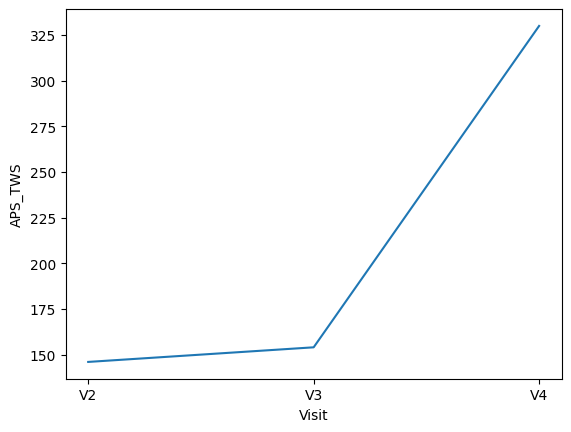

In [22]:
sns.lineplot(data = res, x = 'Visit',y = 'APS_TWS')

# All Children Plots in one Graph

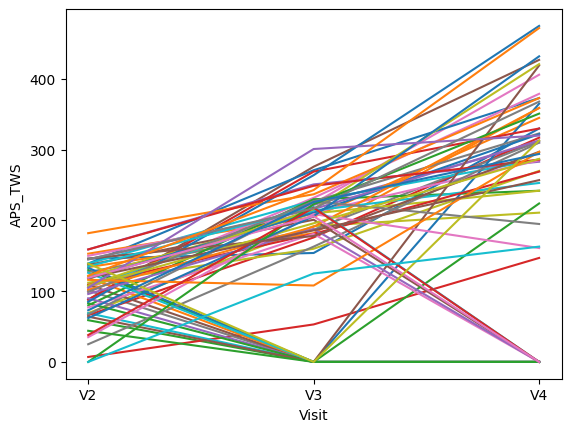

In [23]:
for i in range(len(df)):
    res = df.loc[i:i, ['C_2_APS_TWS', 'C_3_APS_TWS', 'C_4_APS_TWS']] \
           .rename(columns={"C_2_APS_TWS": "V2", "C_3_APS_TWS": "V3", "C_4_APS_TWS": "V4"}) \
           .melt()
    res.rename(columns={"variable": "Visit", "value": "APS_TWS"}, inplace=True)
    res = res.dropna(subset=['APS_TWS'])
    sns.lineplot(data=res, x='Visit', y='APS_TWS')

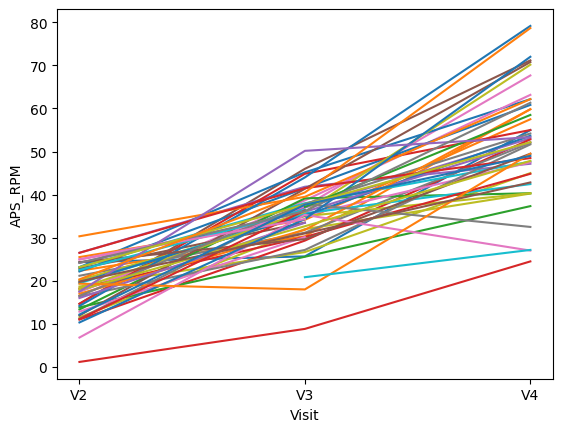

In [24]:
for i in range(len(df)):
    res = df.loc[i:i, ['C_2_APS_RPM', 'C_3_APS_RPM', 'C_4_APS_RPM']] \
           .rename(columns={"C_2_APS_RPM": "V2", "C_3_APS_RPM": "V3", "C_4_APS_RPM": "V4"}) \
           .melt()
    res.rename(columns={"variable": "Visit", "value": "APS_RPM"}, inplace=True)
    res = res.dropna(subset=['APS_RPM'])
    sns.lineplot(data=res, x='Visit', y='APS_RPM')

# Individual plots for each child 

In [2]:
for i in range(len(df)):
    CID = df.loc[i, 'CID']
    res = df.loc[i:i, ['C_2_APS_TWS', 'C_3_APS_TWS', 'C_4_APS_TWS']].rename(
        columns={"C_2_APS_TWS": "V2", "C_3_APS_TWS": "V3", "C_4_APS_TWS": "V4"}
    ).melt()
    res.rename(columns={"variable": "Visit", "value": "APS_TWS"}, inplace=True)

    # Create a new figure for each i
    plt.figure()

    # Check if all values in 'APS_TWS' are NaN
    if res['APS_TWS'].isna().all():
        # Plot an empty graph if all values are NaN
        plt.title(f'Empty plot for CID {CID} (all values are NaN)')
        plt.xlabel('Visit')
        plt.ylabel('APS_TWS')
    else:
        # Otherwise, plot the data normally
        sns.lineplot(data=res, x='Visit', y='APS_TWS')
        plt.title(f'Line plot for CID {CID}')

    plt.show()

In [1]:
for i in range(len(df)):
    CID = df.loc[i, 'CID']
    res = df.loc[i:i, ['C_2_APS_RPM', 'C_3_APS_RPM', 'C_4_APS_RPM']].rename(
        columns={"C_2_APS_RPM": "V2", "C_3_APS_RPM": "V3", "C_4_APS_RPM": "V4"}
    ).melt()
    res.rename(columns={"variable": "Visit", "value": "APS_RPM"}, inplace=True)

    # Create a new figure for each i
    plt.figure()

    # Check if all values in 'APS_TWS' are NaN
    if res['APS_RPM'].isna().all():
        # Plot an empty graph if all values are NaN
        plt.title(f'Empty plot for CID {CID} (all values are NaN)')
        plt.xlabel('Visit')
        plt.ylabel('APS_RPM')
    else:
        # Otherwise, plot the data normally
        sns.lineplot(data=res, x='Visit', y='APS_RPM')
        plt.title(f'Line plot for CID {CID}')

    plt.show()

# Test for Normality 

Shapiro-Wilk test p-value: 0.0000


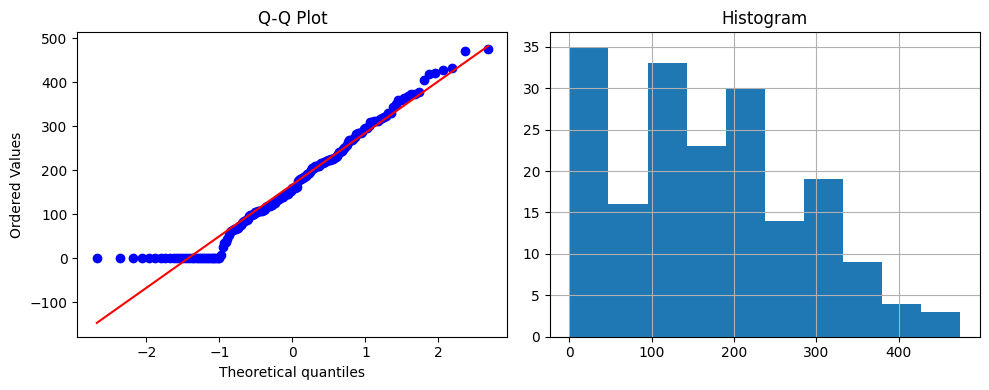

One-way ANOVA results:
F-value: 26.3867
p-value: 0.0000

Tukey's HSD Test Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper   reject
-----------------------------------------------------
     1      2  62.4032 0.0032  17.847 106.9594   True
     1      3 136.8065    0.0 92.2502 181.3627   True
     2      3  74.4032 0.0003  29.847 118.9594   True
-----------------------------------------------------

Means for each visit:
Visit
1    101.467742
2    163.870968
3    238.274194
Name: APS_TWS, dtype: float64


In [73]:
# Reshape the data for easier analysis
df_long = pd.melt(df, id_vars=['CID'], value_vars=['C_2_APS_TWS', 'C_3_APS_TWS', 'C_4_APS_TWS'], 
                  var_name='Visit', value_name='APS_TWS')
df_long['Visit'] = df_long['Visit'].map({'C_2_APS_TWS': 1, 'C_3_APS_TWS': 2, 'C_4_APS_TWS': 3})

# Remove NaN values
df_long = df_long.dropna()

# Test for normality
_, p_value = stats.shapiro(df_long['APS_TWS'])
print(f"Shapiro-Wilk test p-value: {p_value:.4f}")

# Visual check for normality
plt.figure(figsize=(10, 4))
plt.subplot(121)
stats.probplot(df_long['APS_TWS'], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.subplot(122)
df_long['APS_TWS'].hist()
plt.title("Histogram")
plt.tight_layout()
plt.show()

# Perform one-way ANOVA
groups = [group for _, group in df_long.groupby('Visit')['APS_TWS']]
f_value, p_value = stats.f_oneway(*groups)
print(f"One-way ANOVA results:")
print(f"F-value: {f_value:.4f}")
print(f"p-value: {p_value:.4f}")

# Post-hoc test (Tukey's HSD)
tukey_results = pairwise_tukeyhsd(df_long['APS_TWS'], df_long['Visit'])
print("\nTukey's HSD Test Results:")
print(tukey_results)

# Calculate means for each visit
means = df_long.groupby('Visit')['APS_TWS'].mean()
print("\nMeans for each visit:")
print(means)

In [70]:
normality_tests(data)

Shapiro-Wilk test - statistic: nan, p-value: 1.0000
D'Agostino's K^2 test - statistic: nan, p-value: nan
Anderson-Darling test - statistic: nan
  15.0%: 0.552
  10.0%: 0.629
  5.0%: 0.754
  2.5%: 0.880
  1.0%: 1.046


In [9]:
# Reshape the data for analysis
df_long = pd.melt(df, id_vars=['CID'], value_vars=['C_2_APS_TWS', 'C_3_APS_TWS', 'C_4_APS_TWS'], 
                  var_name='Visit', value_name='APS_TWS')
df_long['Visit'] = df_long['Visit'].map({'C_2_APS_TWS': 1, 'C_3_APS_TWS': 2, 'C_4_APS_TWS': 3})

# Remove NaN values
df_long = df_long.dropna()

# Perform Kruskal-Wallis H-test
groups = [group for _, group in df_long.groupby('Visit')['APS_TWS']]
h_statistic, p_value = stats.kruskal(*groups)

print("Kruskal-Wallis Test Results:")
print(f"H-statistic: {h_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Calculate medians for each visit
medians = df_long.groupby('Visit')['APS_TWS'].median()
print("\nMedians for each visit:")
print(medians)

# Calculate sample sizes for each visit
sample_sizes = df_long.groupby('Visit')['APS_TWS'].count()
print("\nSample sizes for each visit:")
print(sample_sizes)

Kruskal-Wallis Test Results:
H-statistic: 41.8420
p-value: 0.0000

Medians for each visit:
Visit
1    107.0
2    203.0
3    286.5
Name: APS_TWS, dtype: float64

Sample sizes for each visit:
Visit
1    62
2    62
3    62
Name: APS_TWS, dtype: int64


**1. Kruskal-Wallis Test Results:**
There is statistically significant differences in the distribution of APS_TWS across the three visits.

**2. Medians for each visit:**
   - Visit 1: 107.0
   - Visit 2: 203.0
   - Visit 3: 286.5

**3. There are statistically significant differences in APS_TWS across the three visits.**
   - From Visit 1 to Visit 2: An increase of 96 units (90% increase)
   - From Visit 2 to Visit 3: An increase of 83.5 units (41% increase)
   - Overall from Visit 1 to Visit 3: An increase of 179.5 units (168% increase)

In [11]:
dunn_results = sp.posthoc_dunn(df_long, val_col='APS_TWS', group_col='Visit', p_adjust='bonferroni')

print("Dunn's Test Results (p-values):")
print(dunn_results)

# Interpret results
print("\nInterpretation:")
for i in range(1, 4):
    for j in range(i + 1, 4):
        p_value = dunn_results.loc[i, j]
        if p_value < 0.05:
            print(f"Visits {i} and {j} differ significantly (p = {p_value:.4f})")
        else:
            print(f"No significant difference between Visits {i} and {j} (p = {p_value:.4f})")

# Calculate effect sizes (Cohen's d) for significant comparisons
print("\nEffect Sizes (Cohen's d) for Significant Comparisons:")
for i in range(1, 4):
    for j in range(i + 1, 4):
        if dunn_results.loc[i, j] < 0.05:
            group1 = df_long[df_long['Visit'] == i]['APS_TWS']
            group2 = df_long[df_long['Visit'] == j]['APS_TWS']
            cohens_d = (group1.mean() - group2.mean()) / np.sqrt((group1.var() + group2.var()) / 2)
            print(f"Visits {i} and {j}: Cohen's d = {cohens_d:.4f}")

Dunn's Test Results (p-values):
              1         2             3
1  1.000000e+00  0.000755  3.380119e-10
2  7.545101e-04  1.000000  1.590211e-02
3  3.380119e-10  0.015902  1.000000e+00

Interpretation:
Visits 1 and 2 differ significantly (p = 0.0008)
Visits 1 and 3 differ significantly (p = 0.0000)
Visits 2 and 3 differ significantly (p = 0.0159)

Effect Sizes (Cohen's d) for Significant Comparisons:
Visits 1 and 2: Cohen's d = -0.8698
Visits 1 and 3: Cohen's d = -1.2389
Visits 2 and 3: Cohen's d = -0.5933


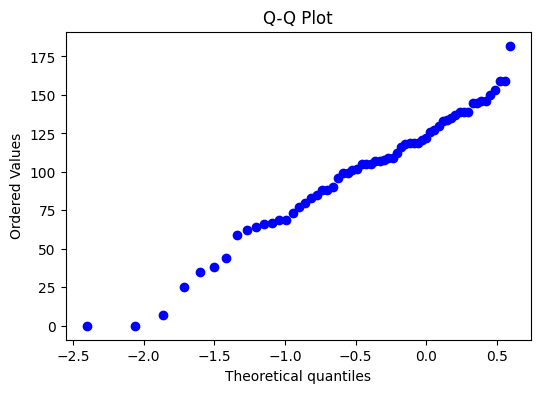

In [66]:
data = df['C_2_APS_TWS']

# 1. Visual methods
def plot_qq(data):
    fig, ax = plt.subplots(figsize=(6, 4))
    stats.probplot(data, dist="norm", plot=ax)
    ax.set_title("Q-Q Plot")
    plt.show()
def plot_histogram(data):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.hist(data, bins='auto', density=True, alpha=0.7)
    ax.set_title("Histogram with Normal Curve")
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, np.mean(data), np.std(data))
    ax.plot(x, p, 'k', linewidth=2)
    plt.show()

# 2. Statistical tests
def normality_tests(data):
    # Shapiro-Wilk test
    statistic, p_value = stats.shapiro(data)
    print(f"Shapiro-Wilk test - statistic: {statistic:.4f}, p-value: {p_value:.4f}")
    
    # D'Agostino's K^2 test
    statistic, p_value = stats.normaltest(data)
    print(f"D'Agostino's K^2 test - statistic: {statistic:.4f}, p-value: {p_value:.4f}")
    
    # Anderson-Darling test
    result = stats.anderson(data)
    print(f"Anderson-Darling test - statistic: {result.statistic:.4f}")
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        print(f"  {sl}%: {cv:.3f}")


plot_qq(data)

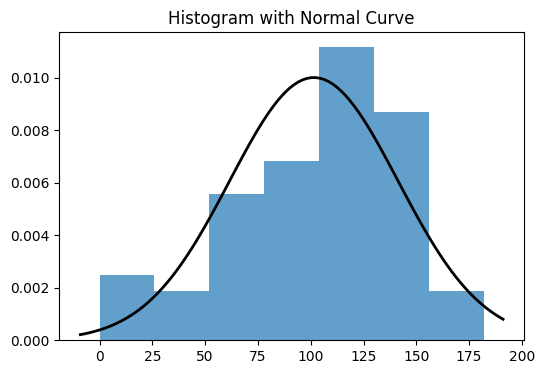

In [69]:
plot_histogram(data)

# Run the code below to save the individual plots 

In [ ]:
for i in range(len(df)):
    CID = df.loc[i, 'CID']
    res = df.loc[i:i, ['C_2_APS_TWS', 'C_3_APS_TWS', 'C_4_APS_TWS']].rename(
        columns={"C_2_APS_TWS": "V2", "C_3_APS_TWS": "V3", "C_4_APS_TWS": "V4"}
    ).melt()
    res.rename(columns={"variable": "Visit", "value": "APS_TWS"}, inplace=True)

    # Create a new figure for each i
    plt.figure()

    # Check if all values in 'APS_TWS' are NaN
    if res['APS_TWS'].isna().all():
        # Plot an empty graph if all values are NaN
        plt.title(f'Empty plot for CID {CID} (all values are NaN)')
        plt.xlabel('Visit')
        plt.ylabel('APS_TWS')
    else:
        # Otherwise, plot the data normally
        sns.lineplot(data=res, x='Visit', y='APS_TWS')
        plt.title(f'Line plot for CID {CID}')

    # Save the plot to a file
    plt.savefig(f'plot_TWS_CID_{CID}.png')  # Save as the plot as PNG
    plt.close()  # Close the plot to avoid displaying it

In [ ]:
for i in range(len(df)):
    CID = df.loc[i, 'CID']
    res = df.loc[i:i, ['C_2_APS_RPM', 'C_3_APS_RPM', 'C_4_APS_RPM']].rename(
        columns={"C_2_APS_RPM": "V2", "C_3_APS_RPM": "V3", "C_4_APS_RPM": "V4"}
    ).melt()
    res.rename(columns={"variable": "Visit", "value": "APS_RPM"}, inplace=True)

    # Create a new figure for each i
    plt.figure()

    # Check if all values in 'APS_TWS' are NaN
    if res['APS_RPM'].isna().all():
        # Plot an empty graph if all values are NaN
        plt.title(f'Empty plot for CID {CID} (all values are NaN)')
        plt.xlabel('Visit')
        plt.ylabel('APS_RPM')
    else:
        # Otherwise, plot the data normally
        sns.lineplot(data=res, x='Visit', y='APS_RPM')
        plt.title(f'Line plot for CID {CID}')

    # Save the plot to a file
    plt.savefig(f'plot_RPM_CID_{CID}.png')  # Save as the plot as PNG
    plt.close()  # Close the plot to avoid displaying it

# Best Scores

In [213]:
# df[df['C_2_APS_TWS']==df['C_2_APS_TWS'].max()]['CID'].values[0] # CID for Child with max C_2_APS_TWS
df[df['C_2_APS_TWS']==df['C_2_APS_TWS'].max()][['CID','C_2_APS_TWS']]

,CID,C_2_APS_TWS
44,1045,182.0


In [214]:
df[df['C_3_APS_TWS']==df['C_3_APS_TWS'].max()][['CID','C_3_APS_TWS']]

,CID,C_3_APS_TWS
72,2025,301.0


In [215]:
df[df['C_4_APS_TWS']==df['C_4_APS_TWS'].max()][['CID','C_4_APS_TWS']]

,CID,C_4_APS_TWS
53,2006,475.0


In [208]:
df[df['CID']==1045]['C_2_APS_TWS']+ df[df['CID']==1045]['C_3_APS_TWS']+ df[df['CID']==1045]['C_4_APS_TWS']

44    792.0
dtype: float64

In [216]:
df[df['CID']==1045]['C_3_APS_TWS']+ df[df['CID']==1045]['C_4_APS_TWS']

44    610.0
dtype: float64

In [211]:
df[df['CID']==2025]['C_2_APS_TWS']+ df[df['CID']==2025]['C_3_APS_TWS']+ df[df['CID']==2025]['C_4_APS_TWS']

72    726.0
dtype: float64

In [228]:
df[df['CID']==2006]['C_2_APS_TWS']+ df[df['CID']==2006]['C_3_APS_TWS']+ df[df['CID']==2006]['C_4_APS_TWS']

53    824.0
dtype: float64

In [244]:
plot_data = df[df['CID'].isin([1045,2025,2006])][['CID','C_2_APS_TWS','C_3_APS_TWS','C_4_APS_TWS']].melt(id_vars = 'CID',var_name = 'Visit',value_name = 'Score')

In [253]:
plot_data = plot_data.replace({'C_2_APS_TWS':'V2','C_3_APS_TWS':'V3','C_4_APS_TWS':'V4'})

plot_data

,CID,Visit,Score
0,1045,V2,182.0
1,2006,V2,85.0
2,2025,V2,105.0
3,1045,V3,237.0
4,2006,V3,264.0
5,2025,V3,301.0
6,1045,V4,373.0
7,2006,V4,475.0
8,2025,V4,320.0


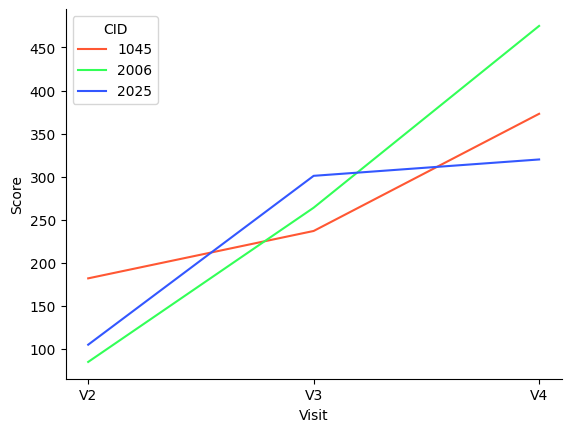

In [254]:
custom_palette = ["#FF5733", "#33FF57", "#3357FF"]  # Red, Green, Blue
sns.lineplot(data = plot_data, x = 'Visit',  y = 'Score',hue = 'CID',palette = custom_palette)
sns.despine()
plt.show()

In [275]:
plot_data = d[~d['C_4_APS_TWS'].isna()].sort_values(by = 'C_4_APS_TWS',ascending = False)[['CID','C_2_APS_TWS','C_3_APS_TWS','C_4_APS_TWS','C_1_SEX']]

In [276]:
plot_data_sex = plot_data.melt(id_vars = 'C_1_SEX',var_name = 'Visit',value_name = 'Score')

In [281]:
plot_data_sex = plot_data_sex[plot_data_sex['Visit']!='CID'].replace({'C_2_APS_TWS':'V2','C_3_APS_TWS':'V3','C_4_APS_TWS':'V4'})

In [294]:
plot_data_sex.groupby('C_1_SEX')['Score'].mean()

C_1_SEX
1.0    169.142857
2.0    166.222222
Name: Score, dtype: float64

In [312]:
plot_data_1 = plot_data[plot_data['C_1_SEX']==1.0][0:5].drop(columns = ['CID','C_1_SEX'],axis = 1)
plot_data_2 = plot_data[plot_data['C_1_SEX']==2.0][0:5].drop(columns = ['CID','C_1_SEX'],axis = 1)

In [315]:
plot_data_1 = plot_data_1.melt(var_name = 'Visit',value_name = 'Score').replace({'C_2_APS_TWS':'V2','C_3_APS_TWS':'V3','C_4_APS_TWS':'V4'})

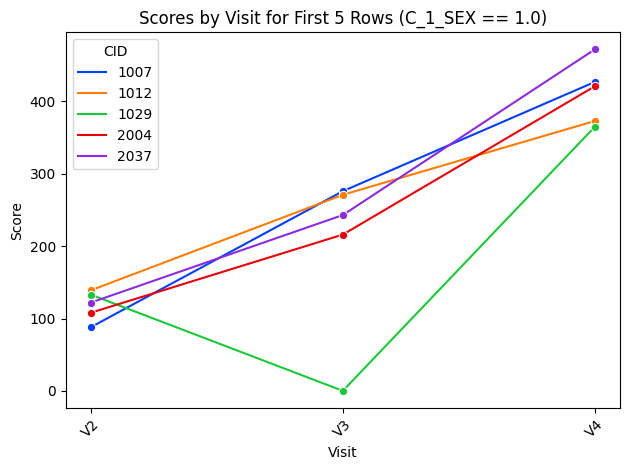

In [323]:
plot_data_1 = plot_data[plot_data['C_1_SEX'] == 1.0][0:5]

plot_data_1 = plot_data_1.drop(columns=['C_1_SEX']).melt(id_vars=['CID'], var_name='Visit', value_name='Score').replace(
    {'C_2_APS_TWS': 'V2', 'C_3_APS_TWS': 'V3', 'C_4_APS_TWS': 'V4'}
)

sns.lineplot(data=plot_data_1, x='Visit', y='Score', hue='CID', marker="o",palette = 'bright')

plt.title('Scores by Visit for First 5 Rows (C_1_SEX == 1.0)')
plt.xlabel('Visit')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

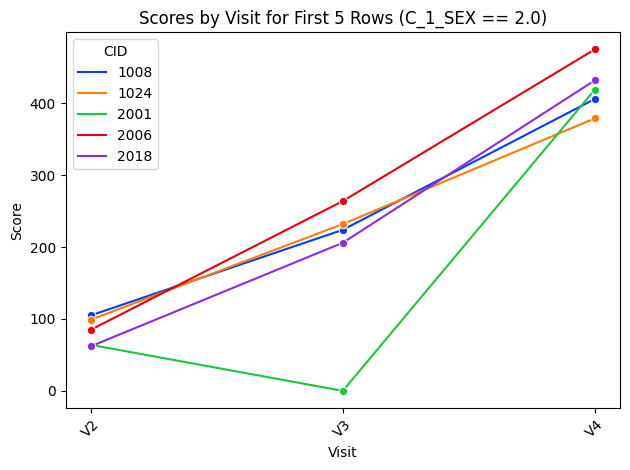

In [325]:
plot_data_2 = plot_data[plot_data['C_1_SEX'] == 2.0][0:5]

plot_data_2 = plot_data_2.drop(columns=['C_1_SEX']).melt(id_vars=['CID'], var_name='Visit', value_name='Score').replace(
    {'C_2_APS_TWS': 'V2', 'C_3_APS_TWS': 'V3', 'C_4_APS_TWS': 'V4'}
)

plot_data_2 = plot_data_2.sort_values(by='CID')

sns.lineplot(data=plot_data_2, x='Visit', y='Score', hue='CID', marker="o",palette = 'bright')

plt.title('Scores by Visit for First 5 Rows (C_1_SEX == 2.0)')
plt.xlabel('Visit')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [326]:
plot_data[plot_data['C_1_SEX'] == 2.0][0:5]

,CID,C_2_APS_TWS,C_3_APS_TWS,C_4_APS_TWS,C_1_SEX
53,2006,85.0,264.0,475.0,2.0
65,2018,62.0,206.0,432.0,2.0
48,2001,64.0,0.0,419.0,2.0
7,1008,105.0,224.0,406.0,2.0
23,1024,99.0,232.0,379.0,2.0


In [327]:
plot_data[plot_data['C_1_SEX'] == 1.0][0:5]

,CID,C_2_APS_TWS,C_3_APS_TWS,C_4_APS_TWS,C_1_SEX
84,2037,122.0,243.0,472.0,1.0
6,1007,88.0,276.0,427.0,1.0
51,2004,108.0,216.0,421.0,1.0
11,1012,139.0,271.0,373.0,1.0
28,1029,133.0,0.0,365.0,1.0


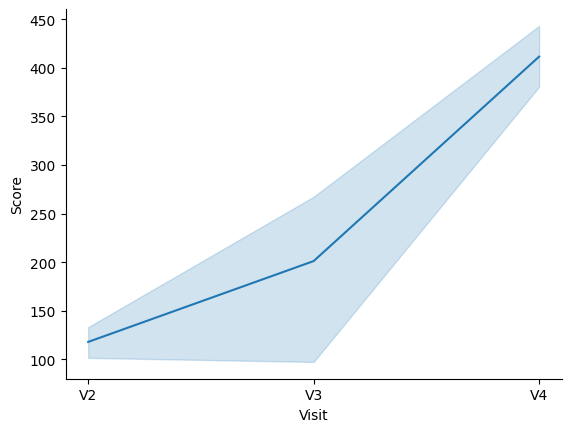

In [316]:
sns.lineplot(data = plot_data_1, x = 'Visit',  y = 'Score')
sns.despine()
plt.show()

In [405]:
cols_filt = ['CID','C_1_TRT','C_2_APS_TWS','C_3_APS_TWS','C_4_APS_TWS']

d_plot = d[~d[cols_filt].isna().any(axis=1)][cols_filt]

grp1 = d_plot.loc[d_plot['C_1_TRT']==1.0,cols_filt][0:5].drop(columns = 'C_1_TRT')
grp2 = d_plot.loc[d_plot['C_1_TRT']==2.0,cols_filt][0:5].drop(columns = 'C_1_TRT')
grp3 = d_plot.loc[d_plot['C_1_TRT']==3.0,cols_filt][0:5].drop(columns = 'C_1_TRT')

In [406]:
grp1 = grp1.melt(id_vars = 'CID',var_name = 'Visit',value_name = 'Score')
grp1['Visit'].replace({'C_2_APS_TWS':'V2','C_3_APS_TWS':'V3','C_4_APS_TWS':'V4'},inplace = True)

grp2 = grp2.melt(id_vars = 'CID',var_name = 'Visit',value_name = 'Score')
grp2['Visit'].replace({'C_2_APS_TWS':'V2','C_3_APS_TWS':'V3','C_4_APS_TWS':'V4'},inplace = True)

grp3 = grp3.melt(id_vars = 'CID',var_name = 'Visit',value_name = 'Score')
grp3['Visit'].replace({'C_2_APS_TWS':'V2','C_3_APS_TWS':'V3','C_4_APS_TWS':'V4'},inplace = True)

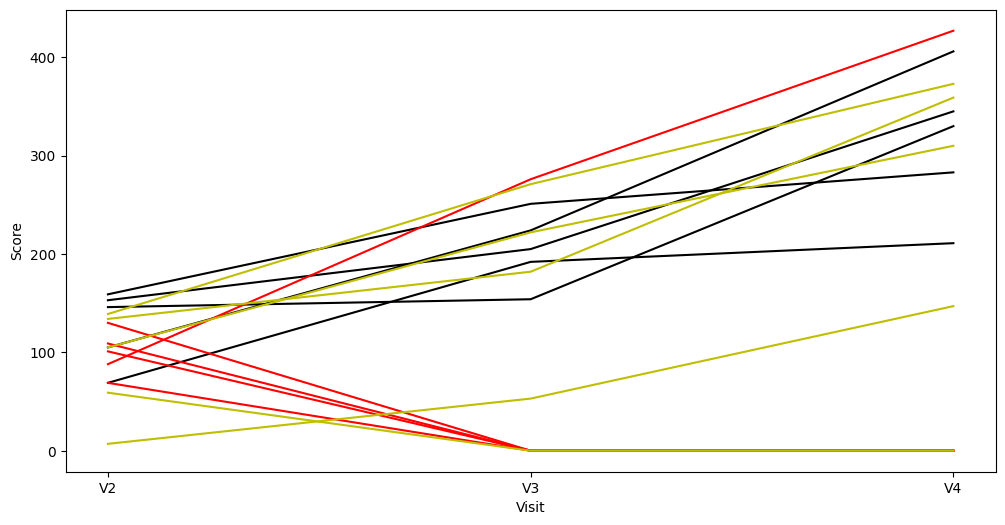

In [435]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=grp1, x='Visit', y='Score', hue='CID', palette=['black','black','black','black','black'],legend = False)
sns.lineplot(data=grp2, x='Visit', y='Score', hue='CID', palette=['r','r','r','r','r'],legend = False)
sns.lineplot(data=grp3, x='Visit', y='Score', hue='CID', palette=['y','y','y','y','y'],legend = False)
plt.show()

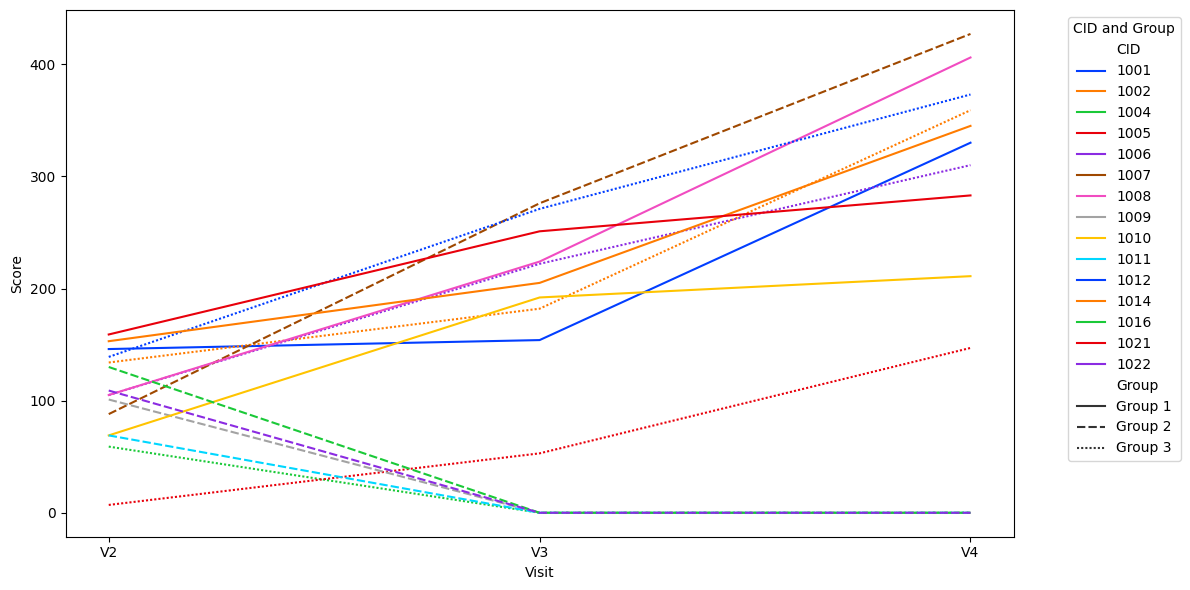

In [428]:
grp1['Group'] = 'Group 1'
grp2['Group'] = 'Group 2'
grp3['Group'] = 'Group 3'

combined_data = pd.concat([grp1, grp2, grp3], ignore_index=True)

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_data, x='Visit', y='Score', hue='CID', style='Group', palette='bright')

plt.xlabel('Visit')
plt.ylabel('Score')

plt.legend(title='CID and Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

# Comparision 

In [5]:
def create_customizable_plot(df, bs3_type='CSs', trt_value=1):
    # Validate input parameters
    if bs3_type not in ['CSs','CSu','CSc','GMu','GMs']:
        raise ValueError("bs3_type must be one of 'CSs', 'CSu','CSc,'GMu' or 'GMs'")
    if trt_value not in [1, 2, 3]:
        raise ValueError("trt_value must be 1, 2, or 3")
    
    # Select desired columns
    desired_cols = [
        'C_1_TRT',
        'C_2_APS_RPM', 'C_3_APS_RPM', 'C_4_APS_RPM',
        f'C_2_BS3_{bs3_type}', f'C_3_BS3_{bs3_type}', f'C_4_BS3_{bs3_type}'
    ]
    
    df_compare1 = df[desired_cols]
    
    # Drop rows with NaN values in specified columns
    df_compare = df_compare1.dropna(subset=[
        'C_2_APS_RPM', f'C_2_BS3_{bs3_type}',
        f'C_3_BS3_{bs3_type}', f'C_4_BS3_{bs3_type}'
    ], how='any')
    
    # Filter data based on C_1_TRT value
    plot_data = df_compare[df_compare['C_1_TRT'] == trt_value].drop(columns='C_1_TRT')
    
    # Calculate mean values
    mean_data = plot_data.mean()
    plot_df = mean_data.reset_index()
    plot_df.columns = ['Metric', 'Value']
    
    # Extract visit number and metric name
    plot_df['Visit'] = plot_df['Metric'].str.extract('C_(\d+)_')
    plot_df['Metric'] = plot_df['Metric'].str.extract('C_\d+_(.+)')
    plot_df['Visit'] = 'V' + plot_df['Visit']
    
    # Create the plot
    custom_palette = ["#FF5733", "#3357FF"]  # Red, Blue
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=plot_df, x='Visit', y='Value', hue='Metric', marker='o', palette=custom_palette)
    
    plt.title(f'Comparison of APSP and Bayley {bs3_type} Scores across Visits (TRT={trt_value})')
    plt.xlabel('Visit')
    plt.ylabel('Value')
    plt.legend(title='Metric')
    plt.xticks(plot_df['Visit'].unique())
    sns.despine()
    plt.show()
    
    return mean_data

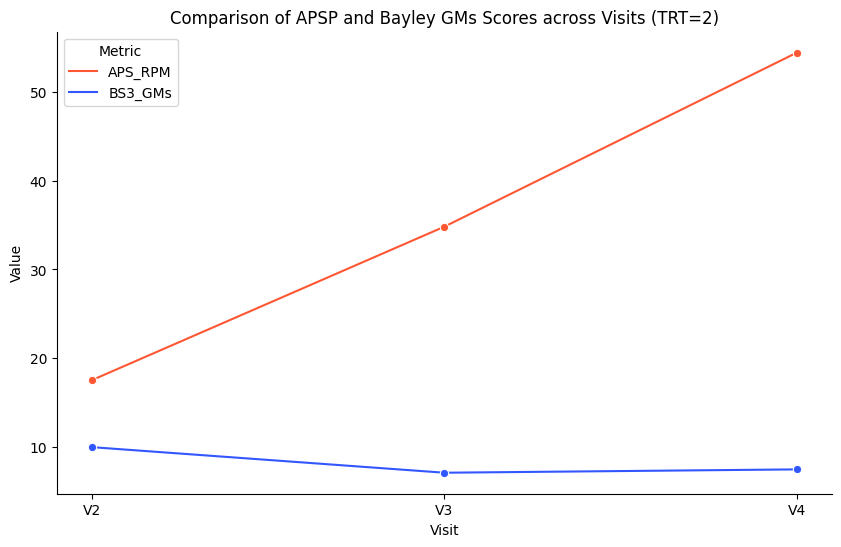

C_2_APS_RPM    17.552222
C_3_APS_RPM    34.808840
C_4_APS_RPM    54.376371
C_2_BS3_GMs    10.000000
C_3_BS3_GMs     7.125000
C_4_BS3_GMs     7.500000
dtype: float64

In [6]:
create_customizable_plot(df2,'GMs',2)

# Plots based on Group 
#### APS_TWS scored on mean

In [38]:
res2 = df.groupby('C_1_TRT')[['C_2_APS_TWS', 'C_3_APS_TWS', 'C_4_APS_TWS']].mean().melt()

res2['Visit'] = res2['variable'].replace({
    'C_2_APS_TWS': 'V2',
    'C_3_APS_TWS': 'V3',
    'C_4_APS_TWS': 'V4'
})

# Group by the 'variable' and assign sequential numbers (1.0, 2.0, 3.0) to each group
res2['C_TRT'] = res2.groupby('variable').cumcount() + 1.0

# Rename 'value' column to 'APS_TWS'
res2.rename(columns={'value': 'APS_TWS'}, inplace=True)

# Drop the original 'variable' column (optional, as we already created 'Visit_Category')
res2.drop(columns=['variable'], inplace=True)

# Resultant DataFrame (res3) will have 'Visit_Category', 'Visit', and 'APS_TWS'

,APS_TWS,Visit,C_TRT
0,115.200000,V2,1.0
1,94.111111,V2,2.0
2,95.541667,V2,3.0
3,170.800000,V3,1.0
4,126.666667,V3,2.0
5,186.000000,V3,3.0
6,272.000000,V4,1.0
7,164.444444,V4,2.0
8,265.541667,V4,3.0


In [40]:
res_display = df.groupby('C_1_TRT')[['C_2_APS_TWS','C_3_APS_TWS','C_4_APS_TWS']].mean()
res_display

,C_2_APS_TWS,C_3_APS_TWS,C_4_APS_TWS
C_1_TRT,,,
1.0,115.200000,170.800000,272.000000
2.0,94.111111,126.666667,164.444444
3.0,95.541667,186.000000,265.541667


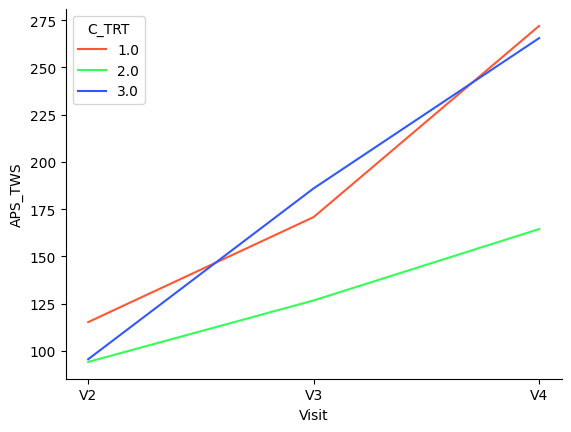

In [39]:
custom_palette = ["#FF5733", "#33FF57", "#3357FF"]  # Red, Green, Blue

sns.lineplot(data = res2, x = 'Visit',y = 'APS_TWS',hue = 'C_TRT',palette = custom_palette)

sns.despine()

plt.show()

# Plots based on Group 
#### APS_RPM scored on mean

In [49]:
res2 = df.groupby('C_1_TRT')[['C_2_APS_RPM', 'C_3_APS_RPM', 'C_4_APS_RPM']].mean().melt()

res2['Visit'] = res2['variable'].replace({
    'C_2_APS_TWS': 'V2',
    'C_3_APS_RPM': 'V3',
    'C_4_APS_RPM': 'V4'
})

res2['C_TRT'] = res2.groupby('variable').cumcount() + 1.0

res2.rename(columns={'value': 'APS_RPM'}, inplace=True)

res2.drop(columns=['variable'], inplace=True)

In [50]:
res_display = df.groupby('C_1_TRT')[['C_2_APS_RPM','C_3_APS_RPM','C_4_APS_RPM']].mean()
res_display

,C_2_APS_RPM,C_3_APS_RPM,C_4_APS_RPM
C_1_TRT,,,
1.0,19.610930,35.633733,53.725901
2.0,17.440280,34.782636,54.834552
3.0,16.822973,33.818182,50.686006


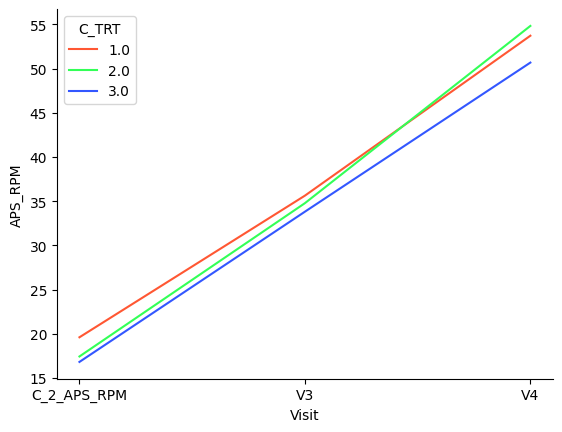

In [51]:
custom_palette = ["#FF5733", "#33FF57", "#3357FF"]  # Red, Green, Blue

sns.lineplot(data = res2, x = 'Visit',y = 'APS_RPM',hue = 'C_TRT',palette = custom_palette)

sns.despine()

plt.show()

# Understanding the Group Means

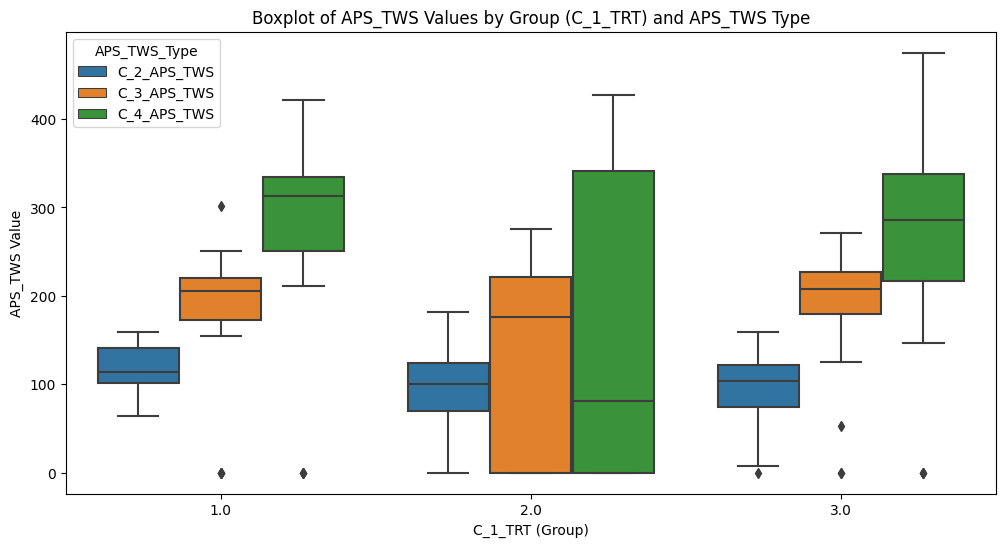

In [35]:
# Drop rows where all APS_TWS columns are NaN
df_clean = df.dropna(subset=['C_2_APS_TWS', 'C_3_APS_TWS', 'C_4_APS_TWS'], how='all')

# Melt the dataframe to have a long format
df_melted = df_clean.melt(id_vars=['C_1_TRT'], value_vars=['C_2_APS_TWS', 'C_3_APS_TWS', 'C_4_APS_TWS'],
                          var_name='APS_TWS_Type', value_name='APS_TWS_Value')

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='C_1_TRT', y='APS_TWS_Value', hue='APS_TWS_Type', data=df_melted)

# Add title and labels
plt.title('Boxplot of APS_TWS Values by Group (C_1_TRT) and APS_TWS Type')
plt.xlabel('C_1_TRT (Group)')
plt.ylabel('APS_TWS Value')

# Show the plot
plt.show()

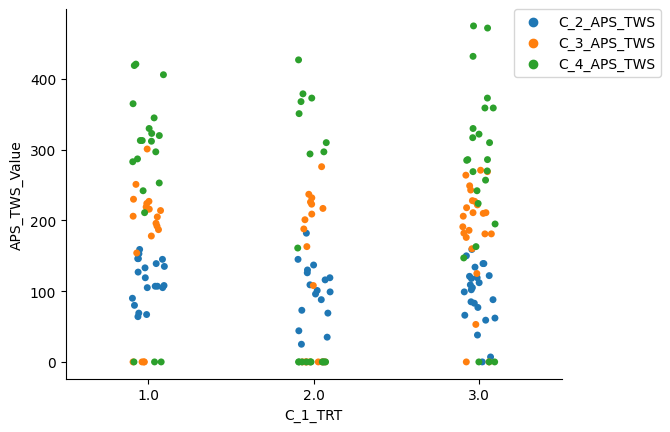

In [36]:
sns.stripplot(x='C_1_TRT', y='APS_TWS_Value', hue='APS_TWS_Type', data=df_melted)
plt.legend(bbox_to_anchor=(1.20, 1), loc='upper right', borderaxespad=0)
sns.despine()
plt.show()

# Outliers 

In [37]:
# Calculate z-scores for each group
df_melted['z_score'] = df_melted.groupby(['C_1_TRT', 'APS_TWS_Type'])['APS_TWS_Value'].transform(lambda x: np.abs(stats.zscore(x)))

# Define outliers as observations with |z-score| > 3
outliers = df_melted[df_melted['z_score'] > 3]

# Print the outliers
print("Outliers:")
print(outliers)

outlier_rows = df[df.index.isin(outliers.index)]

outlier_rows

Outliers:
Empty DataFrame
Columns: [C_1_TRT, APS_TWS_Type, APS_TWS_Value, z_score]
Index: []


In [436]:
def find_outliers_iqr(group):
    q1 = group['APS_TWS_Value'].quantile(0.25)
    q3 = group['APS_TWS_Value'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return group[(group['APS_TWS_Value'] < lower_bound) | (group['APS_TWS_Value'] > upper_bound)]

# Find outliers
outliers = df_melted.groupby(['C_1_TRT', 'APS_TWS_Type']).apply(find_outliers_iqr).reset_index(drop=True)

print("Outliers:")
print(outliers)

# Find corresponding rows in the original dataset
original_outliers = df[df.apply(lambda row: any(
    (row['C_1_TRT'] == out_row['C_1_TRT']) and 
    (row[out_row['APS_TWS_Type']] == out_row['APS_TWS_Value'])
    for _, out_row in outliers.iterrows()
), axis=1)]

print("\nCorresponding rows in the original dataset:")
original_outliers

Outliers:
    C_1_TRT APS_TWS_Type  APS_TWS_Value   z_score
0       1.0  C_3_APS_TWS            0.0  1.898169
1       1.0  C_3_APS_TWS            0.0  1.898169
2       1.0  C_3_APS_TWS            0.0  1.898169
3       1.0  C_3_APS_TWS          301.0  1.446965
4       1.0  C_3_APS_TWS            0.0  1.898169
5       1.0  C_4_APS_TWS            0.0  2.160909
6       1.0  C_4_APS_TWS            0.0  2.160909
7       1.0  C_4_APS_TWS            0.0  2.160909
8       3.0  C_2_APS_TWS            0.0  2.354216
9       3.0  C_3_APS_TWS            0.0  2.558167
10      3.0  C_3_APS_TWS           53.0  1.829227
11      3.0  C_3_APS_TWS            0.0  2.558167
12      3.0  C_4_APS_TWS            0.0  2.057211
13      3.0  C_4_APS_TWS            0.0  2.057211
14      3.0  C_4_APS_TWS            0.0  2.057211

Corresponding rows in the original dataset:


,CID,C_2_APS_TWS,C_3_APS_TWS,C_4_APS_TWS,C_2_APS_RPM,C_3_APS_RPM,C_4_APS_RPM,C_1_TRT
3,1004,59.0,0.0,0.0,9.833333,NaN,NaN,3.0
4,1005,7.0,53.0,147.0,1.166667,8.833333,24.500000,3.0
28,1029,133.0,0.0,365.0,22.166667,NaN,60.833333,1.0
33,1034,90.0,0.0,0.0,15.000000,NaN,NaN,1.0
45,1046,83.0,0.0,224.0,13.833333,NaN,37.333333,3.0
48,2001,64.0,0.0,419.0,11.952786,NaN,70.777027,1.0
49,2002,77.0,181.0,0.0,12.833333,30.166667,NaN,3.0
64,2017,135.0,219.0,0.0,22.500000,36.500000,NaN,1.0
71,2024,38.0,218.0,0.0,11.095052,36.333333,NaN,3.0
72,2025,105.0,301.0,320.0,17.500000,50.166667,53.333333,1.0


In [437]:
filtered_outliers = original_outliers[
    (original_outliers['C_2_APS_TWS'] > 0) &
    (original_outliers['C_3_APS_TWS'] > 0) &
    (original_outliers['C_4_APS_TWS'] > 0)
]
filtered_outliers

,CID,C_2_APS_TWS,C_3_APS_TWS,C_4_APS_TWS,C_2_APS_RPM,C_3_APS_RPM,C_4_APS_RPM,C_1_TRT
4,1005,7.0,53.0,147.0,1.166667,8.833333,24.500000,3.0
72,2025,105.0,301.0,320.0,17.500000,50.166667,53.333333,1.0


# Understanding the Group Means

In [41]:
df.groupby('C_1_TRT')[['C_2_APS_TWS','C_3_APS_TWS','C_4_APS_TWS']].count()

,C_2_APS_TWS,C_3_APS_TWS,C_4_APS_TWS
C_1_TRT,,,
1.0,20,20,20
2.0,18,18,18
3.0,24,24,24


In [42]:
df.groupby('C_1_TRT')[['C_2_APS_TWS','C_3_APS_TWS','C_4_APS_TWS']].min()

,C_2_APS_TWS,C_3_APS_TWS,C_4_APS_TWS
C_1_TRT,,,
1.0,64.0,0.0,0.0
2.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0


In [43]:
df.groupby('C_1_TRT')[['C_2_APS_TWS','C_3_APS_TWS','C_4_APS_TWS']].max()

,C_2_APS_TWS,C_3_APS_TWS,C_4_APS_TWS
C_1_TRT,,,
1.0,159.0,301.0,421.0
2.0,182.0,276.0,427.0
3.0,159.0,271.0,475.0


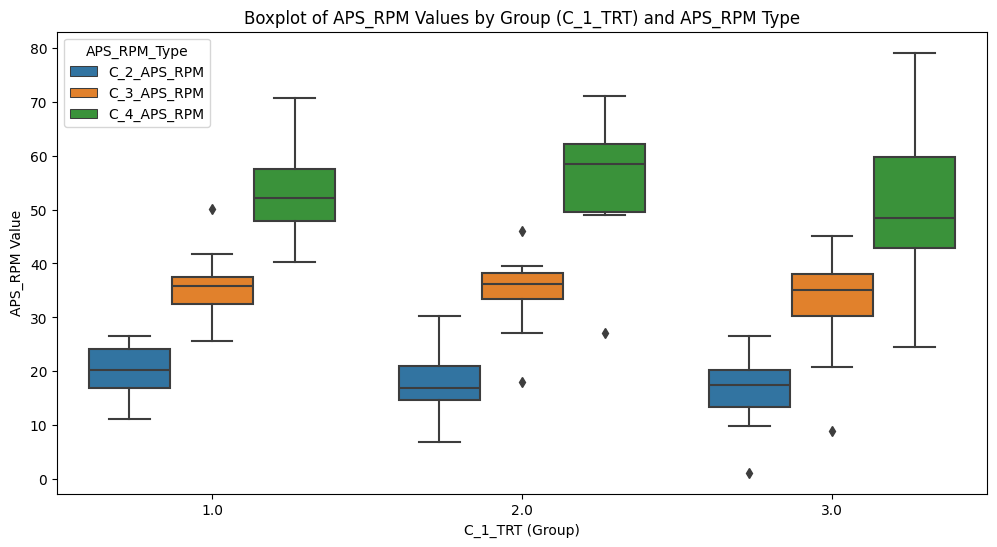

In [32]:
# Drop rows where all APS_TWS columns are NaN
df_clean = df.dropna(subset=['C_2_APS_RPM', 'C_3_APS_RPM', 'C_4_APS_RPM'], how='all')

# Melt the dataframe to have a long format
df_melted = df_clean.melt(id_vars=['C_1_TRT'], value_vars=['C_2_APS_RPM', 'C_3_APS_RPM', 'C_4_APS_RPM'],
                          var_name='APS_RPM_Type', value_name='APS_RPM_Value')

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='C_1_TRT', y='APS_RPM_Value', hue='APS_RPM_Type', data=df_melted)

# Add title and labels
plt.title('Boxplot of APS_RPM Values by Group (C_1_TRT) and APS_RPM Type')
plt.xlabel('C_1_TRT (Group)')
plt.ylabel('APS_RPM Value')

# Show the plot
plt.show()

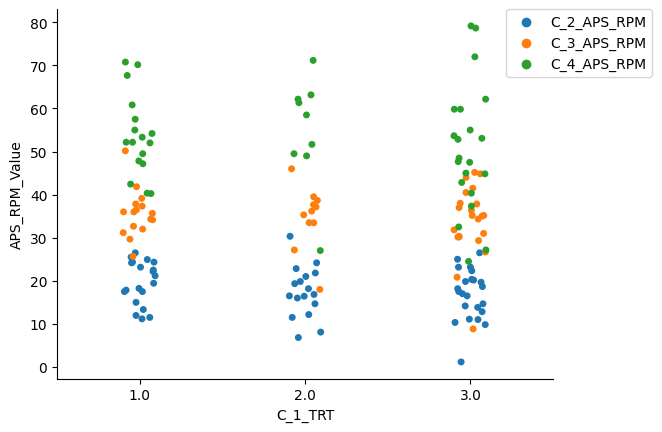

In [33]:
sns.stripplot(x='C_1_TRT', y='APS_RPM_Value', hue='APS_RPM_Type', data=df_melted)
plt.legend(bbox_to_anchor=(1.20, 1), loc='upper right', borderaxespad=0)
sns.despine()
plt.show()

In [54]:
df.groupby('C_1_TRT')[['C_2_APS_RPM','C_3_APS_RPM','C_4_APS_RPM']].count()

,C_2_APS_RPM,C_3_APS_RPM,C_4_APS_RPM
C_1_TRT,,,
1.0,20,16,17
2.0,17,11,9
3.0,23,22,21


In [55]:
df.groupby('C_1_TRT')[['C_2_APS_RPM','C_3_APS_RPM','C_4_APS_RPM']].min()

,C_2_APS_RPM,C_3_APS_RPM,C_4_APS_RPM
C_1_TRT,,,
1.0,11.166667,25.666667,40.252324
2.0,6.827692,18.000000,27.013423
3.0,1.166667,8.833333,24.500000


In [56]:
df.groupby('C_1_TRT')[['C_2_APS_RPM','C_3_APS_RPM','C_4_APS_RPM']].max()

,C_2_APS_RPM,C_3_APS_RPM,C_4_APS_RPM
C_1_TRT,,,
1.0,26.500000,50.166667,70.777027
2.0,30.333333,46.000000,71.166667
3.0,26.500000,45.166667,79.166667


# More data to understand the distribution

In [46]:
df_clean = df.dropna(subset=['C_2_APS_TWS', 'C_3_APS_TWS', 'C_4_APS_TWS'], how='all')

df_melted = df_clean.melt(id_vars=['C_1_TRT'], value_vars=['C_2_APS_TWS', 'C_3_APS_TWS', 'C_4_APS_TWS'],
                          var_name='APS_TWS_Type', value_name='APS_TWS_Value')

value_counts = df_melted.groupby(['C_1_TRT', 'APS_TWS_Type', 'APS_TWS_Value']).size().reset_index(name='Count')

value_counts.sort_values(by = ['APS_TWS_Value','APS_TWS_Type','C_1_TRT'],ascending = [False,True,True])

,C_1_TRT,APS_TWS_Type,APS_TWS_Value,Count
153,3.0,C_4_APS_TWS,475.0,1
152,3.0,C_4_APS_TWS,472.0,1
151,3.0,C_4_APS_TWS,432.0,1
89,2.0,C_4_APS_TWS,427.0,1
49,1.0,C_4_APS_TWS,421.0,1
...,...,...,...,...
68,2.0,C_3_APS_TWS,0.0,7
113,3.0,C_3_APS_TWS,0.0,2
33,1.0,C_4_APS_TWS,0.0,3
80,2.0,C_4_APS_TWS,0.0,9


In [45]:
df_melted_filtered = df_melted[df_melted['APS_TWS_Value'] != 0]

value_counts_filtered = df_melted_filtered.groupby(['C_1_TRT', 'APS_TWS_Type', 'APS_TWS_Value']).size().reset_index(name='Count')

value_counts_filtered = value_counts_filtered.sort_values(by=['Count'], ascending=False)

value_counts_filtered

,C_1_TRT,APS_TWS_Type,APS_TWS_Value,Count
25,1.0,C_3_APS_TWS,216.0,2
111,3.0,C_3_APS_TWS,181.0,2
39,1.0,C_4_APS_TWS,313.0,2
5,1.0,C_2_APS_TWS,105.0,2
6,1.0,C_2_APS_TWS,107.0,2
...,...,...,...,...
46,1.0,C_4_APS_TWS,419.0,1
45,1.0,C_4_APS_TWS,406.0,1
44,1.0,C_4_APS_TWS,365.0,1
43,1.0,C_4_APS_TWS,345.0,1


In [ ]:
# value_counts_filtered[value_counts_filtered['APS_TWS_Type']=='C_2_APS_TWS'][['C_1_TRT','APS_TWS_Value','Count']]

In [ ]:
# value_counts_filtered[value_counts_filtered['APS_TWS_Type']=='C_3_APS_TWS'][['C_1_TRT','APS_TWS_Value','Count']]

In [ ]:
# value_counts_filtered[value_counts_filtered['APS_TWS_Type']=='C_4_APS_TWS'][['C_1_TRT','APS_TWS_Value','Count']]

In [103]:
# Value counts for APS_TWS_Value by group and type
value_counts = df_melted_filtered.groupby(['C_1_TRT', 'APS_TWS_Type', 'APS_TWS_Value']).size().reset_index(name='Count')

# Create bins for APS_TWS_Value
bins = [0, 100, 150, 200, 250, 300, 350, 400, 450, 500, float('inf')]  # 500+
labels = ['0-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500+']

# Create a new column for the binned APS_TWS_Value
value_counts['APS_TWS_Bin'] = pd.cut(value_counts['APS_TWS_Value'], bins=bins, labels=labels, right=False)

# Filter for APS_TWS_Type 'C_2_APS_TWS' and select desired columns
filtered_result_1 = value_counts[value_counts['APS_TWS_Type'] == 'C_2_APS_TWS'][['C_1_TRT', 'APS_TWS_Value', 'Count', 'APS_TWS_Bin']]

value_counts = df_melted_filtered.groupby(['C_1_TRT', 'APS_TWS_Type', 'APS_TWS_Value']).size().reset_index(name='Count')
value_counts['APS_TWS_Bin'] = pd.cut(value_counts['APS_TWS_Value'], bins=bins, labels=labels, right=False)
filtered_result_2 = value_counts[value_counts['APS_TWS_Type'] == 'C_3_APS_TWS'][['C_1_TRT', 'APS_TWS_Value', 'Count', 'APS_TWS_Bin']]

value_counts = df_melted_filtered.groupby(['C_1_TRT', 'APS_TWS_Type', 'APS_TWS_Value']).size().reset_index(name='Count')
value_counts['APS_TWS_Bin'] = pd.cut(value_counts['APS_TWS_Value'], bins=bins, labels=labels, right=False)
filtered_result_3 = value_counts[value_counts['APS_TWS_Type'] == 'C_4_APS_TWS'][['C_1_TRT', 'APS_TWS_Value', 'Count', 'APS_TWS_Bin']]

In [ ]:
# print(filtered_result_1.sort_values(by=['Count'], ascending=False))
# print(filtered_result_2.sort_values(by=['Count'], ascending=False))
# print(filtered_result_3.sort_values(by=['Count'], ascending=False))

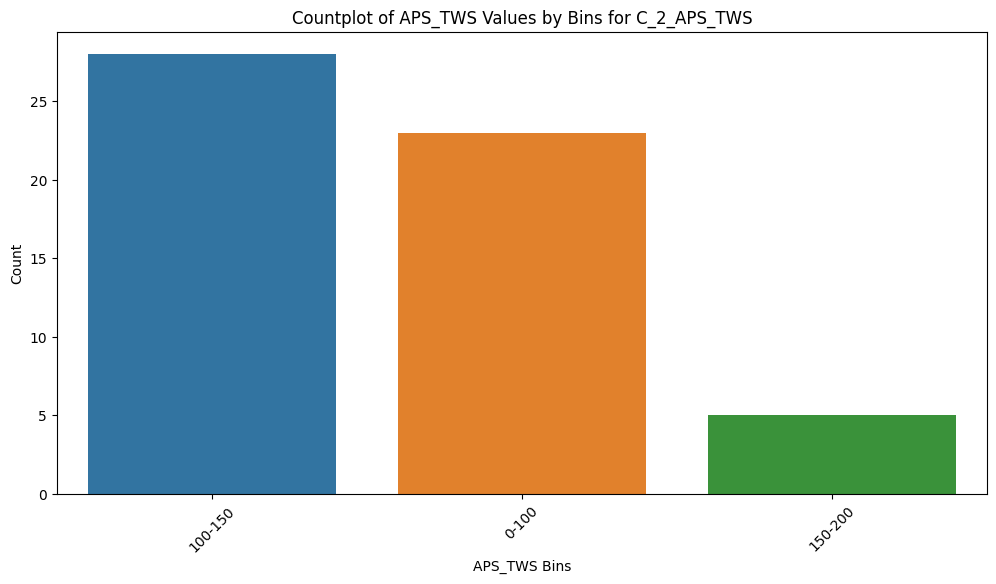

In [104]:
# Get the counts of each bin
bin_counts = filtered_result_1['APS_TWS_Bin'].value_counts()

# Filter bins with counts > 0
non_zero_bins = bin_counts[bin_counts > 0].index

# Plotting countplot for each APS_TWS_Bin that has counts > 0
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_result_1[filtered_result_1['APS_TWS_Bin'].isin(non_zero_bins)], 
                x='APS_TWS_Bin', order=non_zero_bins)

# Add title and labels
plt.title('Countplot of APS_TWS Values by Bins for C_2_APS_TWS')
plt.xlabel('APS_TWS Bins')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

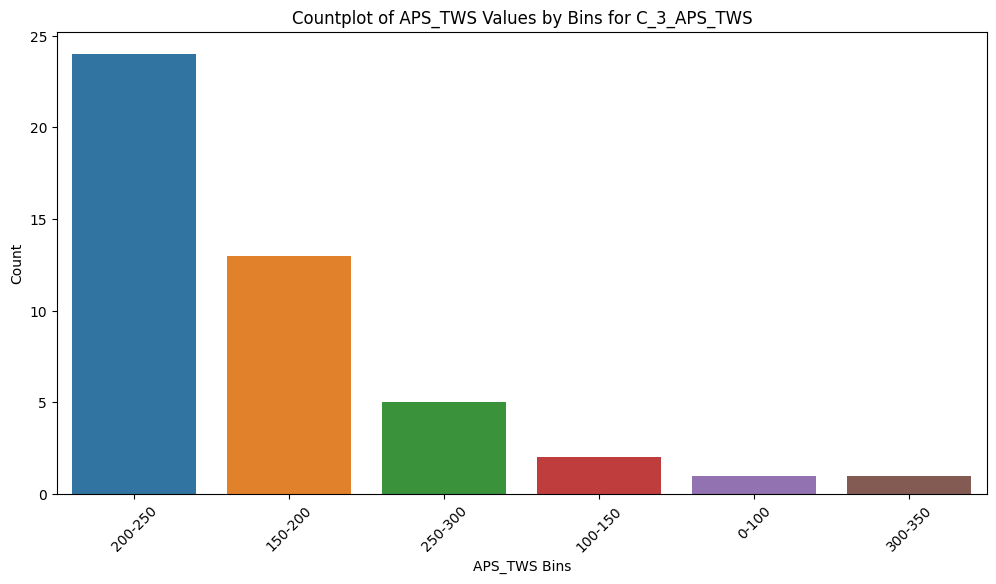

In [105]:
bin_counts = filtered_result_2['APS_TWS_Bin'].value_counts()

non_zero_bins = bin_counts[bin_counts > 0].index

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_result_2[filtered_result_2['APS_TWS_Bin'].isin(non_zero_bins)], 
                x='APS_TWS_Bin', order=non_zero_bins)

plt.title('Countplot of APS_TWS Values by Bins for C_3_APS_TWS')
plt.xlabel('APS_TWS Bins')
plt.ylabel('Count')

plt.xticks(rotation=45)  
plt.show()

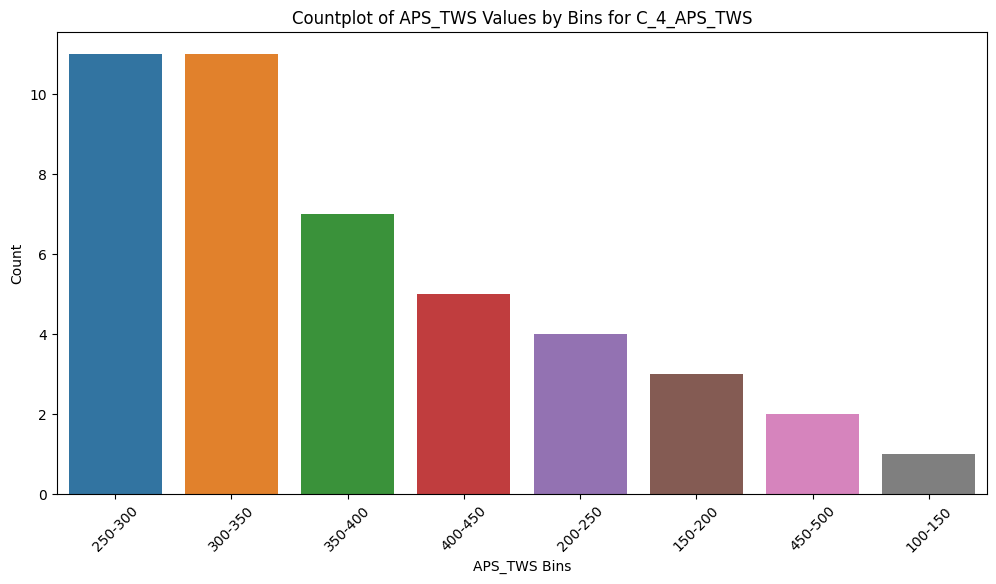

In [106]:
bin_counts = filtered_result_3['APS_TWS_Bin'].value_counts()

non_zero_bins = bin_counts[bin_counts > 0].index

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_result_3[filtered_result_3['APS_TWS_Bin'].isin(non_zero_bins)], 
                x='APS_TWS_Bin', order=non_zero_bins)

plt.title('Countplot of APS_TWS Values by Bins for C_4_APS_TWS')
plt.xlabel('APS_TWS Bins')
plt.ylabel('Count')

plt.xticks(rotation=45)  
plt.show()

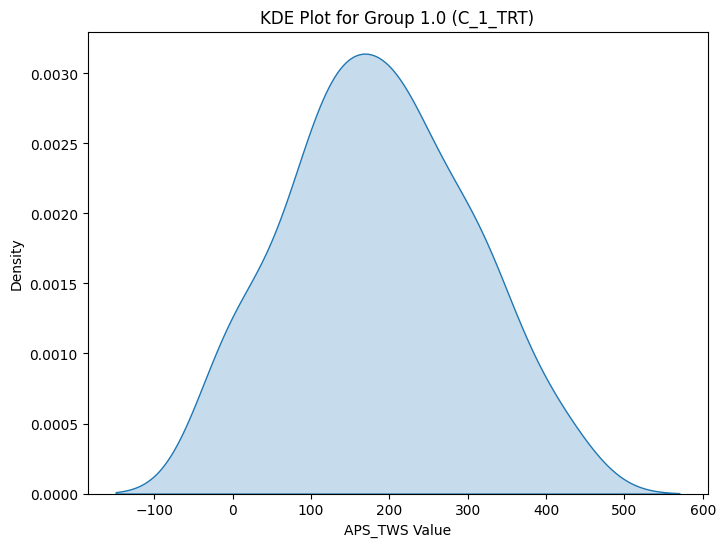

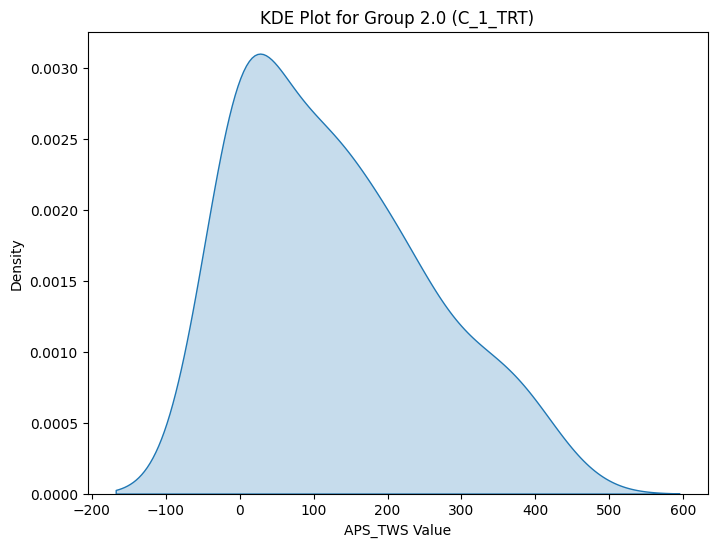

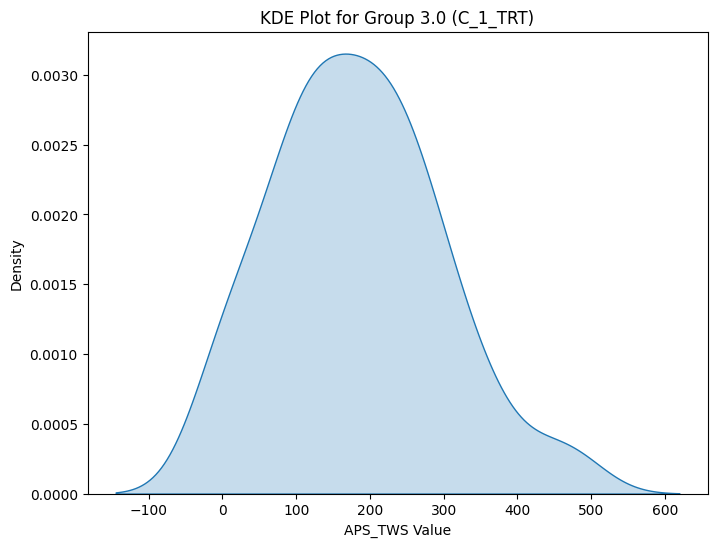

In [10]:
# Drop rows where all APS_TWS columns are NaN
df_clean = df.dropna(subset=['C_2_APS_TWS', 'C_3_APS_TWS', 'C_4_APS_TWS'], how='all')

# Group the cleaned data by 'C_1_TRT'
grouped = df_clean.groupby('C_1_TRT')

# Loop through each group and plot the KDE
for group, data in grouped:
    # Concatenate APS_TWS values from different columns into a single series for KDE plotting
    aps_tws_values = pd.concat([data['C_2_APS_TWS'].dropna(), 
                                data['C_3_APS_TWS'].dropna(), 
                                data['C_4_APS_TWS'].dropna()])
    
    # If there are valid values to plot
    if not aps_tws_values.empty:
        plt.figure(figsize=(8, 6))
        
        # Create KDE plot
        sns.kdeplot(aps_tws_values, fill=True)
        
        # Add title and labels
        plt.title(f'KDE Plot for Group {group} (C_1_TRT)')
        plt.xlabel('APS_TWS Value')
        plt.ylabel('Density')
        
        # Show the plot
        plt.show()

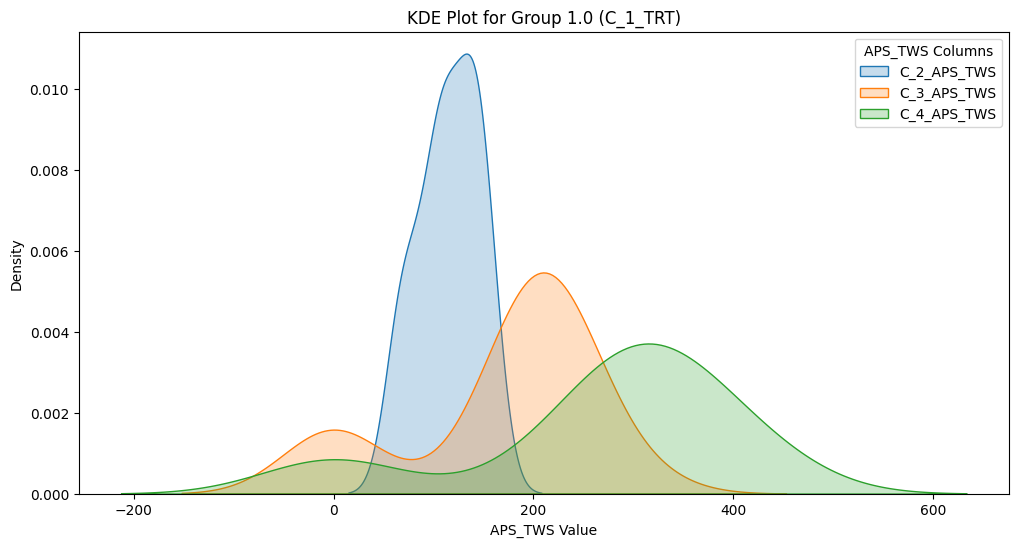

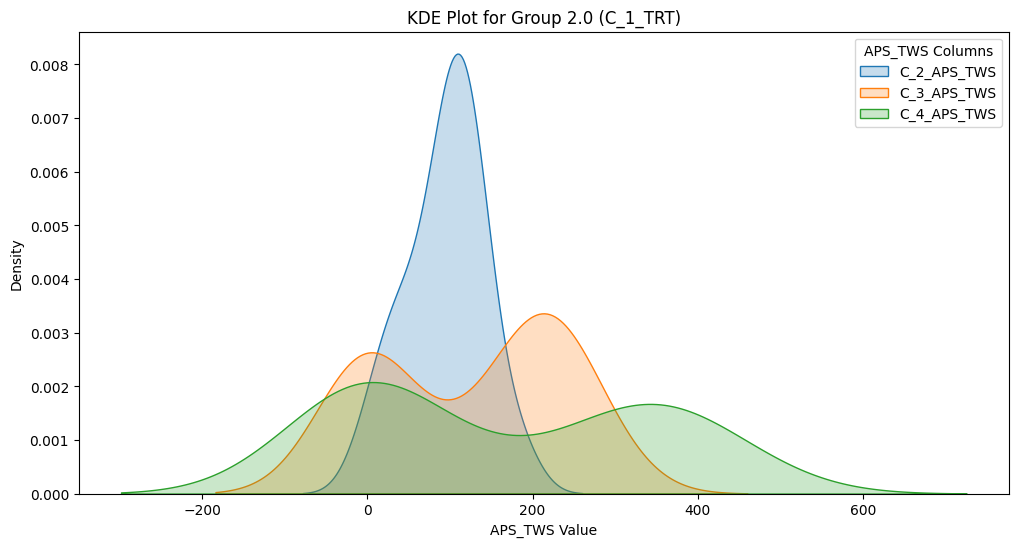

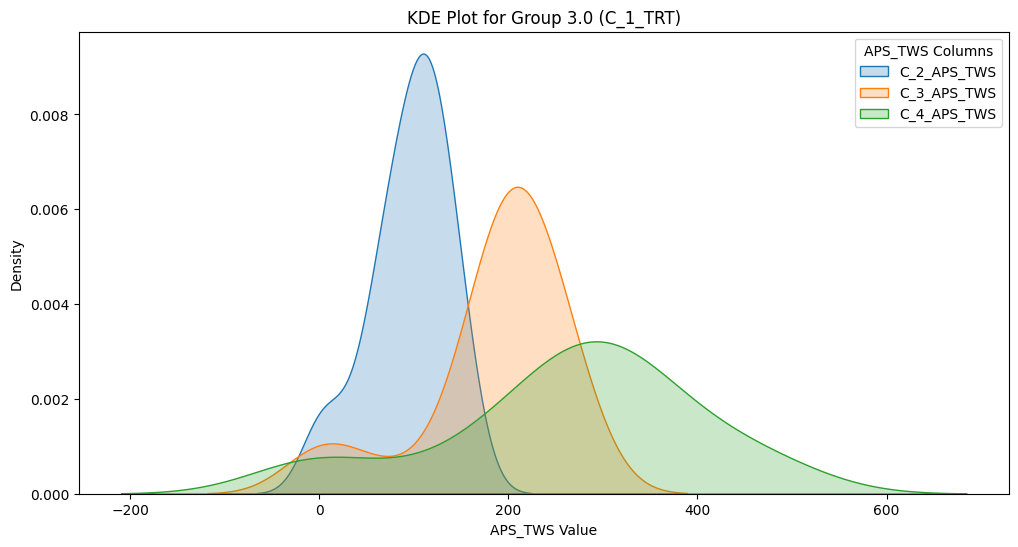

In [11]:
# Drop rows where all APS_TWS columns are NaN
df_clean = df.dropna(subset=['C_2_APS_TWS', 'C_3_APS_TWS', 'C_4_APS_TWS'], how='all')

# Group the cleaned data by 'C_1_TRT'
grouped = df_clean.groupby('C_1_TRT')

# Loop through each group and plot the KDE for each APS_TWS column individually
for group, data in grouped:
    plt.figure(figsize=(12, 6))
    
    # Create a KDE plot for C_2_APS_TWS
    if not data['C_2_APS_TWS'].dropna().empty:
        sns.kdeplot(data['C_2_APS_TWS'].dropna(), fill=True, label='C_2_APS_TWS')
    
    # Create a KDE plot for C_3_APS_TWS
    if not data['C_3_APS_TWS'].dropna().empty:
        sns.kdeplot(data['C_3_APS_TWS'].dropna(), fill=True, label='C_3_APS_TWS')
    
    # Create a KDE plot for C_4_APS_TWS
    if not data['C_4_APS_TWS'].dropna().empty:
        sns.kdeplot(data['C_4_APS_TWS'].dropna(), fill=True, label='C_4_APS_TWS')
    
    # Add title, labels, and legend
    plt.title(f'KDE Plot for Group {group} (C_1_TRT)')
    plt.xlabel('APS_TWS Value')
    plt.ylabel('Density')
    plt.legend(title="APS_TWS Columns")
    
    # Show the plot
    plt.show()

# Extra Stuff 

In [36]:
# # Group by 'C_1_TRT' and calculate the min and max for each group, ignoring NaNs
# range_df = df.groupby('C_1_TRT')[['C_2_APS_TWS', 'C_3_APS_TWS', 'C_4_APS_TWS']].agg(
#     lambda x: pd.Series({'min': x.min(skipna=True), 'max': x.max(skipna=True)})
# )

# # Flatten the MultiIndex columns created by the aggregation
# range_df.columns = ['_'.join(col) for col in range_df.columns]

# # Creating bins for each column within each group, ignoring NaN values
# bins_df = df.groupby('C_1_TRT')[['C_2_APS_TWS', 'C_3_APS_TWS', 'C_4_APS_TWS']].apply(lambda x: pd.DataFrame({
#     'C_2_APS_TWS_bins': pd.cut(x['C_2_APS_TWS'].dropna(), bins=5),  # Adjust 'bins=5' as needed
#     'C_3_APS_TWS_bins': pd.cut(x['C_3_APS_TWS'].dropna(), bins=5),
#     'C_4_APS_TWS_bins': pd.cut(x['C_4_APS_TWS'].dropna(), bins=5)
# })).reset_index(drop=True)

# # Merging the range and bins
# result_df = pd.concat([range_df, bins_df], axis=1)

# result_df

In [37]:
# for col in ['C_2_APS_TWS', 'C_3_APS_TWS', 'C_4_APS_TWS']:
#     plt.figure()
#     df[col].plot(kind='hist', bins=30)
#     plt.title(f'Histogram of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.show()

In [ ]:
272-170.8

In [ ]:
170.8 - 115.2

In [ ]:
186-95.54

In [ ]:
265.54 - 186